# Table of Contents
```
1. Business Understanding
   1.1. Problem Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. Data Loading
   2.3. Exploratory Data Analysis
        2.3.1. Understand the data with Descriptive Statistics on the raw data
        2.3.2. Draw Univariate plots to better understand each attribute
        2.3.3. Draw Multivariate plots to better understand the relationships between attributes
3. Research
4. Data Preprocessing
5. Visualizations
```

# 1. Business Understanding

## 1.1. Problem Description

**`Problem Statement`**: 

Find out the trends in the Urban Postal Life Insurances (UPLI) and the Rural Postal Life Insurances (RPLI) in India for the period between the financial years 2001-02 & 2015-16.

Input data are in `data/India PLI and RPLI Data 2001-2014.csv`, `data/India PLI and RPLI Data 2001-2015.csv` and `data/India PLI and RPLI Data 2001-2016.csv` 

**`Type of the problem`**: Visualization - Bar chart with Trend lines

**`Data source`**: Open Government Data (OGD) Platform India. [UPLI and RPLI data upto 2013-14](https://data.gov.in/resources/postal-life-insurance-pli-rural-postal-life-insurance-rpli-polices-issued-upto-2013-14), [UPLI and RPLI data upto 2014-15](https://data.gov.in/resources/postal-life-insurance-pli-rural-postal-life-insurance-rpli-policies-issued-upto-2014-15), and [UPLI and RPLI data upto 2015-16](https://data.gov.in/resources/postal-life-insurance-pli-rural-postal-life-insurance-rpli-policies-issued-2001-02-2015-16)

**`Author`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from pandas.plotting     import scatter_matrix

warnings.filterwarnings('ignore')

## 2.2. Data Loading

In [2]:
colnames = ['Year','C1','C2','UPLI Amount','UPLI % Growth','C5','C6','C7','C8', 'RPLI Amount','RPLI % Growth','C11','C12']

df14 = pd.read_csv('data/India PLI and RPLI Data 2001-2014.csv', 
                   names = colnames,
                   header=0)
df15 = pd.read_csv('data/India PLI and RPLI Data 2001-2015.csv', 
                   names = colnames,
                   header=0)
df16 = pd.read_csv('data/India PLI and RPLI Data 2001-2016.csv', 
                   names = colnames,
                   header=0)

## 2.3. Exploratory Data Analysis

### 2.3.1. Understand the data with Descriptive Statistics on the raw data

In [3]:
print('Dimensions of the datasets:\n')
print('UPLI and RPLI Data 2001-2014: ', df14.shape, '\n')
print('UPLI and RPLI Data 2001-2015: ', df15.shape, '\n')
print('UPLI and RPLI Data 2001-2016: ', df16.shape, '\n')

Dimensions of the datasets:

UPLI and RPLI Data 2001-2014:  (13, 13) 

UPLI and RPLI Data 2001-2015:  (14, 13) 

UPLI and RPLI Data 2001-2016:  (15, 13) 



In [4]:
print('2001-2014 data:')
df14.style.background_gradient(cmap='Blues', axis=0).highlight_null('brown').hide_index()

2001-2014 data:


Year,C1,C2,UPLI Amount,UPLI % Growth,C5,C6,C7,C8,RPLI Amount,RPLI % Growth,C11,C12
2001-02,2008575,nan,11870.300000,nan,5090.160000,nan,1133013,nan,4403.920000,nan,341.050000,nan
2002-03,2098577,4.460000,13676.800000,15.210000,5797.300000,13.890000,1795070,58.430000,7464.530000,69.500000,510.690000,49.740000
2003-04,2208683,5.240000,15917.610000,16.380000,6619.810000,14.190000,2666485,48.540000,12385.110000,65.920000,756.480000,48.130000
2004-05,2857797,29.390000,18747.210000,17.770000,7678.420000,15.990000,3796773,42.390000,18895.930000,52.570000,1127.610000,49.060000
2005-06,3098248,8.410000,22951.600000,22.430000,8933.690000,16.350000,4702776,23.860000,25229.660000,33.520000,1624.770000,44.090000
2006-07,3297825,6.440000,26753.170000,16.560000,10342.610000,15.770000,5246673,11.560000,33865.650000,34.230000,2284.920000,40.630000
2007-08,3550084,7.650000,31469.000000,17.630000,12081.710000,16.810000,6167928,17.560000,41846.090000,23.560000,3003.780000,31.460000
2008-09,3841539,8.210000,38403.000000,22.030000,14152.590000,17.140000,7356446,19.270000,53072.100000,26.820000,3994.360000,32.980000
2009-10,4283302,11.500000,51209.900000,33.340000,16656.020000,17.680000,9925103,34.910000,59572.590000,12.240000,5524.690000,38.310000
2010-11,4686245,9.400000,64077.900000,25.120000,19801.910000,18.880000,12203345,22.950000,66132.230000,11.010000,6607.790000,19.600000


In [5]:
print('\n2001-2015 data:')
df15.style.background_gradient(cmap='Greens', axis=0).highlight_null('brown').hide_index()


2001-2015 data:


Year,C1,C2,UPLI Amount,UPLI % Growth,C5,C6,C7,C8,RPLI Amount,RPLI % Growth,C11,C12
2001-02,2008575,nan,11870.300000,nan,5090.160000,nan,1133013,nan,4403.920000,nan,341.050000,nan
2002-03,2098577,4.460000,13676.800000,15.210000,5797.300000,13.890000,1795070,58.430000,7464.530000,69.500000,510.690000,49.740000
2003-04,2208683,5.240000,15917.610000,16.380000,6619.810000,14.190000,2666485,48.540000,12385.110000,65.920000,756.480000,48.130000
2004-05,2857797,29.390000,18747.210000,17.770000,7678.420000,15.990000,3796773,42.390000,18895.930000,52.570000,1127.610000,49.060000
2005-06,3098248,8.410000,22951.600000,22.430000,8933.690000,16.350000,4702776,23.860000,25229.660000,33.520000,1624.770000,44.090000
2006-07,3297825,6.440000,26753.170000,16.560000,10342.610000,15.770000,5246673,11.560000,33865.650000,34.230000,2284.920000,40.630000
2007-08,3550084,7.650000,31469.000000,17.630000,12081.710000,16.810000,6167928,17.560000,41846.090000,23.560000,3003.780000,31.460000
2008-09,3841539,8.210000,38403.000000,22.030000,14152.590000,17.140000,7356446,19.270000,53072.100000,26.820000,3994.360000,32.980000
2009-10,4283302,11.500000,51209.900000,33.340000,16656.020000,17.680000,9925103,34.910000,59572.590000,12.240000,5524.690000,38.310000
2010-11,4686245,9.400000,64077.900000,25.120000,19801.910000,18.880000,12203345,22.950000,66132.230000,11.010000,6607.790000,19.600000


In [6]:
print('2001-2016 data:')
df16.style.background_gradient(cmap='viridis', axis=0).highlight_null('brown').hide_index()

2001-2016 data:


Year,C1,C2,UPLI Amount,UPLI % Growth,C5,C6,C7,C8,RPLI Amount,RPLI % Growth,C11,C12
2001-02,2008575,nan,11870.300000,nan,5090.160000,nan,1133013,nan,4403.920000,nan,341.050000,nan
2002-03,2098577,4.460000,13676.800000,15.210000,5797.300000,13.890000,1795070,58.430000,7464.530000,69.500000,510.690000,49.740000
2003-04,2208683,5.240000,15917.610000,16.380000,6619.810000,14.190000,2666485,48.540000,12385.110000,65.920000,756.480000,48.130000
2004-05,2857797,29.390000,18747.210000,17.770000,7678.420000,15.990000,3796773,42.390000,18895.930000,52.570000,1127.610000,49.060000
2005-06,3098248,8.410000,22951.600000,22.430000,8933.690000,16.350000,4702776,23.860000,25229.660000,33.520000,1624.770000,44.090000
2006-07,3297825,6.440000,26753.170000,16.560000,10342.610000,15.770000,5246673,11.560000,33865.650000,34.230000,2284.920000,40.630000
2007-08,3550084,7.650000,31469.000000,17.630000,12081.710000,16.810000,6167928,17.560000,41846.090000,23.560000,3003.780000,31.460000
2008-09,3841539,8.210000,38403.000000,22.030000,14152.590000,17.140000,7356446,19.270000,53072.100000,26.820000,3994.360000,32.980000
2009-10,4283302,11.500000,51209.900000,33.340000,16656.020000,17.680000,9925103,34.910000,59572.590000,12.240000,5524.690000,38.310000
2010-11,4686245,9.400000,64077.900000,25.120000,19801.910000,18.880000,12203345,22.950000,66132.230000,11.010000,6607.790000,19.600000


In [7]:
print('Statistical summary of the 2001-2016 dataset:\n')
print(df16.describe(), '\n')

Statistical summary of the 2001-2016 dataset:

                 C1         C2    UPLI Amount  UPLI % Growth            C5  \
count  1.500000e+01  14.000000      15.000000      14.000000     15.000000   
mean   3.849030e+06   8.166429   52128.628000      17.471429  18460.584667   
std    1.216651e+06   6.552350   36681.550033       7.693089  12968.235558   
min    2.008575e+06   3.030000   11870.300000       0.800000   5090.160000   
25%    2.978022e+06   4.655000   20849.405000      15.425000   8306.055000   
50%    3.841539e+06   6.630000   38403.000000      17.095000  14152.590000   
75%    4.968449e+06   8.360000   82743.905000      21.405000  25600.275000   
max    5.406093e+06  29.390000  109982.100000      33.340000  46302.000000   

              C6            C7         C8   RPLI Amount  RPLI % Growth  \
count  14.000000  1.500000e+01  14.000000     15.000000      14.000000   
mean   17.103571  8.558731e+06  21.772143  47453.233333      25.275714   
std     2.339144  5.314387e+

### 2.3.2. Draw Univariate plots to better understand each attribute

Univariate - Box and Wishker plots (2001-2016):


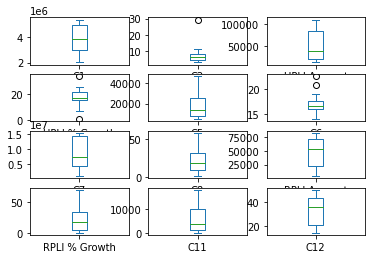

Univariate - Histograms (2001-2016):


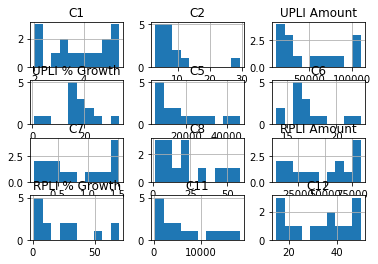

In [8]:
print('Univariate - Box and Wishker plots (2001-2016):')
df16.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

print('Univariate - Histograms (2001-2016):')
df16.hist()
plt.show()

### 2.3.3. Draw Multivariate plots to better understand the relationships between attributes

Multivariate - Scatter Plot Matrix (2001-2016):


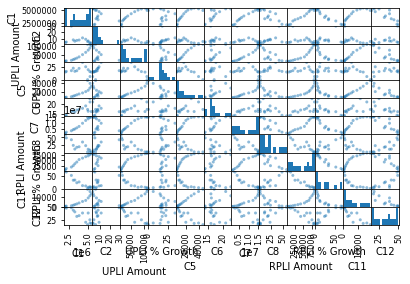

In [9]:
print('Multivariate - Scatter Plot Matrix (2001-2016):')
scatter_matrix(df16)
plt.show()

# 3. Research

For this project, 2 line charts superimposed on bar charts would be ideal display the trends.

# 4. Data Preprocessing

In [10]:
# Extract only the Year, Amounts and Growth columns for UPLI & RPLI, from all 3 datasets
df14 = df14.iloc[:, [0, 3, 4, 9, 10]]
df15 = df15.iloc[:, [0, 3, 4, 9, 10]]
df16 = df16.iloc[:, [0, 3, 4, 9, 10]]

# Perform data consistency check and proceed further
if not(df14.equals(df15[0:-1])):
    print('WARNING: Inconsistencies between the data in 2001-2014 and 2001-2015 datasets...')
if not(df15.equals(df16[0:-1])):
    print('WARNING: Inconsistencies between the data in 2001-2015 and 2001-2016 datasets...')
    print('Dataset 2001-2016 has been used for plotting...')

# 5. Visualizations

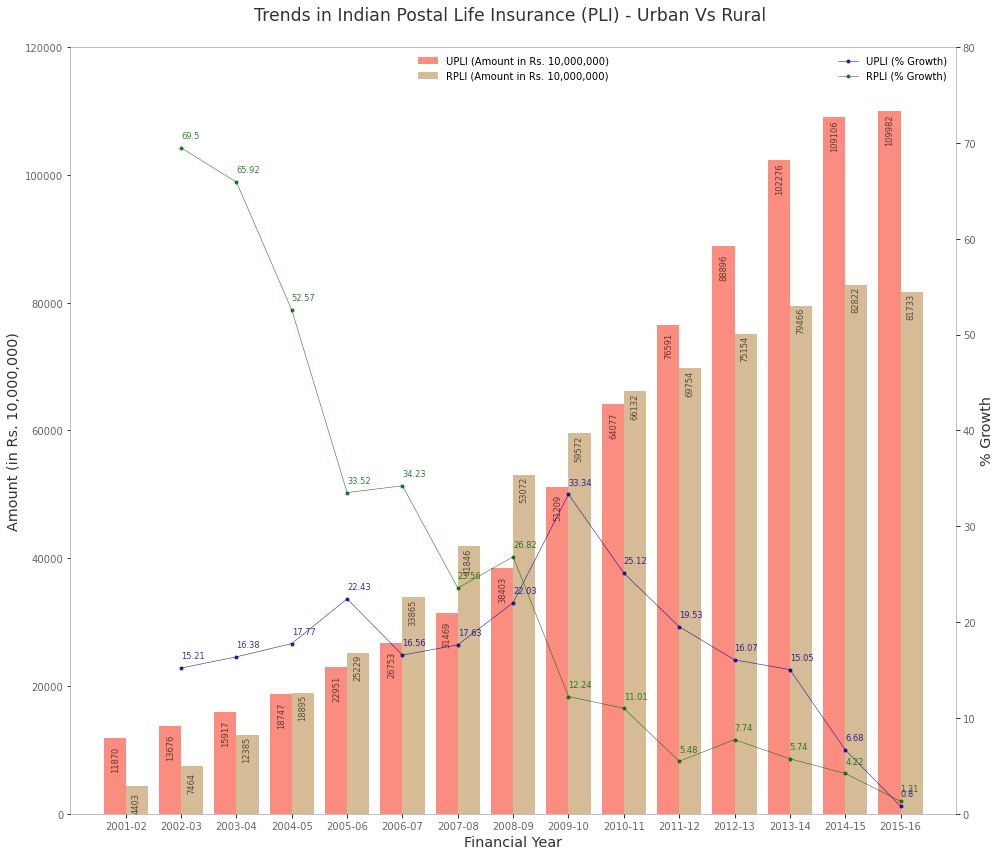

In [11]:
plt.figure(figsize=(14,12))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(False)
ax2.grid(False)

# Use the following code snippet if it's a single bar chart
#x1 = range(len(df16.iloc[:,1]))
#x2 = []
#for i in x1:
#    x2.append(i + 0.4)

# Get the data for the Bar (Amounts columns) and Line charts (% Growths columns)
UPLIamt = df16.iloc[:,1]
UPLIgp  = df16.iloc[:,2]
RPLIamt = df16.iloc[:,3]
RPLIgp  = df16.iloc[:,4]

# Set the Limits, Ticks and Labels for the X-axis and Y-axis
ax1.set_xlim(-1, 15)
ax1.set_ylim(0, 120000)
ax2.set_ylim(0, 80)
ax1_xticklabels = df16.iloc[:,0]
ax1_yticklabels = range(0, 140000, 20000)
ax2_yticklabels = range(0, 90, 10)
ax1_xticks      = np.arange(len(ax1_xticklabels))
ax1.set_xticks(ax1_xticks)
ax1.set_xticklabels(ax1_xticklabels, fontsize = 'medium', alpha = 0.6)
ax1.set_yticklabels(ax1_yticklabels, fontsize = 'medium', alpha = 0.6)
ax2.set_yticklabels(ax2_yticklabels, fontsize = 'medium', alpha = 0.6)

# Plot the Bar and Line charts
width = 0.4
ax1.bar(ax1_xticks - width/2, UPLIamt, width, color='salmon', alpha=0.9)
ax1.bar(ax1_xticks + width/2, RPLIamt, width, color='tan', alpha=0.9)
ax2.plot(ax1_xticks, UPLIgp, '-o', markersize=3, linewidth=0.6, color='darkblue', alpha=0.8)
ax2.plot(ax1_xticks, RPLIgp, '-o', markersize=3, linewidth=0.6, color='darkgreen', alpha=0.8)

# Add data values to the Line charts for UPLI and RPLI % Growths
for i,j in UPLIgp.items():
    ax2.annotate(str(j), xy=(i, j+1), fontsize='small', color='darkblue', alpha=0.8)
for i,j in RPLIgp.items():
    ax2.annotate(str(j), xy=(i, j+1), fontsize='small', color='darkgreen', alpha=0.8)

# Add data values to the Bar charts for UPLI and RPLI Amounts
for i,j in UPLIamt.items():
    ax1.annotate(str(int(j)), xy=(i-0.27, j-5000), rotation='vertical', fontsize='small', color='black', alpha=0.6)
for i,j in RPLIamt.items():
    ax1.annotate(str(int(j)), xy=(i+0.11, j-4000), rotation='vertical', fontsize='small', color='black', alpha=0.6)

# Set the Title, X-label, Y-labels and the Legends
ax1.set_title('Trends in Indian Postal Life Insurance (PLI) - Urban Vs Rural \n', fontsize='xx-large', alpha=0.8)
ax1.set_xlabel('Financial Year', fontsize='x-large', alpha=0.8)
ax1.set_ylabel('Amount (in Rs. 10,000,000)', fontsize='x-large', alpha=0.8)
ax2.set_ylabel('% Growth', fontsize='x-large', alpha=0.8)
ax1.legend(loc='upper center', labels=['UPLI (Amount in Rs. 10,000,000)', 'RPLI (Amount in Rs. 10,000,000)'], 
           fontsize = 'medium', frameon = False)
ax2.legend(loc='best', labels=['UPLI (% Growth)', 'RPLI (% Growth)'],
           fontsize = 'medium', frameon = False)

# Lighten all 4 spines of the Outer frame in Axis 1
for spine in ax1.spines:
    ax1.spines[spine].set_alpha(0.3)

# Remove all 4 spines of the Outer frame in Axis 2
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
